[e9t/nsmc: Naver sentiment movie corpus](https://github.com/e9t/nsmc)

In [1]:
# 라이브러리로드하고 폰트 설정하기
# pandas, numpy, seaborn

import pandas as pd
import numpy as np
import seaborn as sns

sns.set(font='Malgun Gothic')

## 데이터 로드하기

In [2]:
# train

train = pd.read_csv('data/ratings_train.txt', sep='\t')
train.shape

(150000, 3)

In [3]:
train[['id','document']]

,id,document
0,9976970,아 더빙.. 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..
149996,8549745,평점이 너무 낮아서...
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


In [4]:
# test

test = pd.read_csv('data/ratings_test.txt', sep='\t')
test.shape

(50000, 3)

In [5]:
train['document'][0][:10]

'아 더빙.. 진짜 '

In [6]:
# head 로 미리보기

train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
# tail로 미리보기
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
# info로 정보보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


### 중복 데이터 제거

In [9]:
train.shape

(150000, 3)

In [10]:
# drop_duplicates 로 train 중복제거

train = train.drop_duplicates().copy()
train.shape

(150000, 3)

In [11]:
test.shape

(50000, 3)

In [12]:
# drop_duplicates 로 test 중복제거

test = test.drop_duplicates().copy()
test.shape

(50000, 3)

### 결측치 제거

In [13]:
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [14]:
# train

train = train.dropna(how='any', axis=0)

In [15]:
train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [16]:
test.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [17]:
# test

test = test.dropna(how='any', axis=0)

In [18]:
test.isnull().sum()

id          0
document    0
label       0
dtype: int64

### 빠른 학습을 위해 일부만 샘플링

In [19]:
# train

train = train.sample(10000, random_state=42).reset_index(drop=True).copy()
train.shape

(10000, 3)

In [21]:
train.head()

,id,document,label
0,7865795,원본이 최고,1
1,5417631,스릴감과 훈훈함이 있는 영화.,1
2,8357466,굉장히 저평가되는 영화중 하나라고 생각함,1
3,8252946,정말영화같은이야기 영화여서 영화같은이야기가 좋다,1
4,7800452,계기도없는데 이상하다,0


In [22]:
train['document'][0][:10]

'원본이 최고'

In [23]:
# test`

test = test.sample(2000, random_state=42).reset_index(drop=True).copy()
test.shape

(2000, 3)

In [24]:
test['document'][0][:10]

'찐한 여운과 함께.'

### 결측치 확인

In [25]:
#  train

train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [26]:
# test

test.isnull().sum()

id          0
document    0
label       0
dtype: int64

## 정답값 보기

In [27]:
# value_counts 로 빈도수 세기

train['label'].value_counts()

1    5005
0    4995
Name: label, dtype: int64

In [28]:
# value_counts 로 비율 보기

train['label'].value_counts(normalize = True)

1    0.5005
0    0.4995
Name: label, dtype: float64

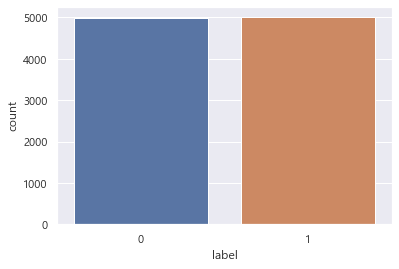

In [29]:
# countplot 으로 빈도수 세기

sns.countplot(data = train, x='label')

## 문서 분석하기

### 중복값 보기

In [30]:
# nunique 값 보기

train.nunique()

id          10000
document     9897
label           2
dtype: int64

In [199]:
# 중복데이터 확인

train[train.duplicated()].shape

(0, 3)

### 단어 수 세기

In [32]:
train['document'][11]

'일단 말이안된다, 전투기가 미사일을 맞았음에도, 일부만 파손된다는건 아주 말이안되고, 미사일맞고 전투기가 바다로 꼬라 박았는데,어찌 기체손상이없고, 조종사가 살수있는지 이건 도무지 말이안된다, 좀 디테일하게 사실적으로 그렸으면 좋았을듯하다...'

In [33]:
# len
# word_count - split 을 통해 리스트로 만들고 갯수를 셉니다.
# unique_word_count - split을 통해 리스트로 만든 값에서 set 을 해주면 중복을 제거합니다.

words = train['document'][11].split()
print(len(words))
words[:30]

25


['일단',
 '말이안된다,',
 '전투기가',
 '미사일을',
 '맞았음에도,',
 '일부만',
 '파손된다는건',
 '아주',
 '말이안되고,',
 '미사일맞고',
 '전투기가',
 '바다로',
 '꼬라',
 '박았는데,어찌',
 '기체손상이없고,',
 '조종사가',
 '살수있는지',
 '이건',
 '도무지',
 '말이안된다,',
 '좀',
 '디테일하게',
 '사실적으로',
 '그렸으면',
 '좋았을듯하다...']

In [34]:
unique_words = set(words)

In [35]:
print(len(unique_words))
unique_words

23


{'그렸으면',
 '기체손상이없고,',
 '꼬라',
 '도무지',
 '디테일하게',
 '말이안되고,',
 '말이안된다,',
 '맞았음에도,',
 '미사일맞고',
 '미사일을',
 '바다로',
 '박았는데,어찌',
 '사실적으로',
 '살수있는지',
 '아주',
 '이건',
 '일단',
 '일부만',
 '전투기가',
 '조종사가',
 '좀',
 '좋았을듯하다...',
 '파손된다는건'}

In [36]:
# "len", "word_count", "unique_word_count" 을 봅니다.
print(len(words))
print(words)
print(unique_words)

25
['일단', '말이안된다,', '전투기가', '미사일을', '맞았음에도,', '일부만', '파손된다는건', '아주', '말이안되고,', '미사일맞고', '전투기가', '바다로', '꼬라', '박았는데,어찌', '기체손상이없고,', '조종사가', '살수있는지', '이건', '도무지', '말이안된다,', '좀', '디테일하게', '사실적으로', '그렸으면', '좋았을듯하다...']
{'말이안되고,', '일단', '사실적으로', '박았는데,어찌', '아주', '디테일하게', '그렸으면', '말이안된다,', '미사일맞고', '바다로', '좀', '맞았음에도,', '파손된다는건', '기체손상이없고,', '살수있는지', '전투기가', '미사일을', '꼬라', '도무지', '조종사가', '좋았을듯하다...', '일부만', '이건'}


In [0]:
# "len", "word_count", "unique_word_count" 을 distplot으로 시각화 합니다.


In [43]:
import re

def preprocessing(text):
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub(' +', ' ', text)
    # 중복으로 생성된 ㅋ 값을 제거합니다.
    text = re.sub('ㅋ+', 'ㅋ', text)
    #
    return text

In [44]:
# 아래의 결과가  "재미있었어요ㅋ" 가 나오도록 위 preprocessing 을 고쳐보세요.
preprocessing("재미있었어요ㅋㅋㅋㅋㅋ")

'재미있었어요ㅋ'

In [47]:
# preprocessing 함수를 적용합니다.

clean_review = preprocessing(train['document'][23])
clean_review

'이런거 한달후면 투니버스에 나는 공짜로 봤지요 푸컄캬캬캬컄컄컄'

In [49]:
num_reviews = train['document'].size
num_reviews

10000

In [50]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train['document'], preprocessing, workers=4)

### 불용어 제거

In [0]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['안녕', '안녕하세요', '있습니다', '하는', 
             '그', '및', '제', '할', '하고', '더', '대한', 
             '한', '그리고', '월', '저는', '없는', '입니다', 
             '등', '일', '많은', '이런', '것은', '왜','같은', 
             '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [0]:
# remove_stopwords 함수를 적용합니다.



### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [0]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 :  r"C:\Windows\Fonts\Malgun Gothic.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def display_wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["영화"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

## 단어 벡터화 하기
### BOW(bag of words)
* 가장 간단하지만 효과적이라 널리쓰이는 방법
* 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아립니다.
* 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있습니다.
* BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 합니다.
    - `it's bad, not good at all.` 
    - `it's good, not bad at all.` 
* 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환됩니다.
* 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 합니다.
* min_df는 문서에 특정 단어가 최소 몇 번 이상 문서에 등장하는 단어를 가방에 담겠다는 의미입니다.

* [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

### 사이킷런의 CountVectorizer를 통해 벡터화
* 미리 전처리 해둔 텍스트 데이터로 벡터화 합니다.
* 모두 소문자로 변환시키기 때문에 영어의 경우 good, Good, gOod이 모두 같은 특성이 됩니다.
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 번이상 문서에 나타난 토큰만을 사용한다.
* [6.2. Feature extraction — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
* [sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [0]:
# analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
# tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
# preprocessor = None, # 전처리 도구
# stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
# min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
# ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
# max_features = 2000 # 만들 피처의 수, 단어의 수가 된다.
# CountVectorizer를 불러와서 vectorizer 에 담습니다.



#### fit, fit_transform의 차이
* fit 을 하더라도 fit_transform(raw_documents) 을 호출함

In [0]:
# vectorizer.fit_transform??

In [0]:
## fit_transform 으로 train 데이터를 변환합니다.



In [0]:
## fit_transform 으로  test 데이터를 변환합니다.



In [0]:
# 위에서 vectorizer 결과에서 get_feature_names 를 가져와서 단어 사전을 확인합니다.
# 단어사전의 갯수를 세고 미리보기 해봅니다.



In [0]:
# np.sum 으로 위에서 구한 train_feature_vector 의 값을 모두 더합니다. axis=0 으로 합니다. 



In [0]:
# 위에서 구한 빈도수를 그래프로 그립니다.



### TF-IDF
TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

역문서 빈도(IDF)는 한 단어가 문서 집합 전체에서 얼마나 공통적으로 나타나는지를 나타내는 값이다. 전체 문서의 수를 해당 단어를 포함한 문서의 수로 나눈 뒤 로그를 취하여 얻을 수 있다.

* 출처 : [TF-IDF - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/TF-IDF)

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}


* 싸이킷런 공식문서 : [6.2. Feature extraction — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/feature_extraction.html)

#### TfidfTransformer()
* norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정한다. 
    - L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값
    - L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절
* smooth_idf=False
    - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
* sublinear_tf=False
* use_idf=True
    - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [0]:
# TfidfTransformer 를 불러와서 transformer 라는 변수에 담습니다.



In [0]:
# 위에서 벡터화 한 train 데이터를 fit_transform 으로 변환합니다.



In [0]:
# 위에서 벡터화 한 test 데이터를 fit_transform 으로 변환합니다.



In [0]:
#  np.sum 으로 train_feature_tfidf 의 결과 값을 행을 기준으로 더해줍니다.
# 사전과 함께 데이터프레임으로 만들고 vocab_count 라는 변수에 저장하고 재사용합니다.



In [0]:
# 위에서 만든 데이터프레임을 빈도수로 정렬하고 상위 50위 어휘를 막대그래프로 그립니다.



In [0]:
# label 값을 y_label 에 할당해서 재사용합니다.



## 예측하기

In [0]:
# RandomForestClassifier 를 불러옵니다.
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용 합니다. 모델을 선언합니다.



In [0]:
# # cross_val_predict 로 스코어 계산을 해봅니다.
# from sklearn.model_selection import cross_val_predict

# y_valid = cross_val_predict(model, train_feature_tfidf, y_label, cv=3, n_jobs=-1)
# y_valid

### 학습과 예측

In [0]:
# fit 으로 학습시킵니다.



In [0]:
# predict로 예측합니다. 



### 정답값과 예측값의 갯수 확인

In [0]:
# 예측값의 갯수를 확인합니다.


In [0]:
# 정답값을 재사용하기 위해 y_test 라는 변수에 할당합니다.



### 점수 보기

[sklearn.metrics.f1_score — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [0]:
# accuracy_score, f1_score 를 구해봅니다.



### ROC curve 그리기
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=roc_curve#sklearn.metrics.plot_roc_curve

In [0]:
# plot_roc_curve 로 roc_curve 를 그려봅니다.

